<a href="https://colab.research.google.com/github/smrithisriram/Visual-Data-Analysis-In-Banking/blob/main/Visual_Data_Analysis_In_Banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This project aims to perform exploratory data analysis on banking dataset to identify underlying patterns in consumer behavior, credit risk and deposit trends by deriving actionable insights.

# Objective & Dataset Used

The data that we are going to use for this is a subset of an open source Bank Marketing Data Set from the UCI ML repository: https://archive.ics.uci.edu/ml/citation_policy.html.

During the work, the task of a preliminary analysis of a positive response (term deposit) to direct calls from the bank is solved. In essence, the task is the matter of bank scoring, i.e. according to the characteristics of clients (potential clients), their behavior is predicted (loan default, a wish to open a deposit, etc.).

In [ ]:
#Import the required libraries

import pandas as pd                   #Pandas is a python library for performing data preprocessing

import matplotlib.pyplot as plt       #Matplotlib is a plotting library for the Python programming language

import numpy as np                    #NumPy is another library that supports mathematical computation for complex problems

import seaborn as sns                 #Seaborn is a visualizing library built on top of Matplotlib that provides interactive visuals of dataset
%matplotlib inline

In [ ]:
#rcParams is a dictionary structure used for improving plots and visuals

plt.rcParams["figure.figsize"] = (10, 5)

In [ ]:
#Adjusting the decimals to maximum of 2 digits instead of default value 6

pd.set_option("display.precision", 2)
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
#Import the dataset

#Creating a dataframe
df = pd.read_csv('/content/bank-additional-full.csv', sep = ';')

#Display first 5 rows of the dataframe
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [ ]:
#Mapping values of the target value ('y' in the problem) to integer values (0 & 1)
d = {"no":0, "yes":1}
df["y"] = df["y"].map(d)

In [ ]:
#Printing the attribute (columns) information
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
#Printing the shape of the dataset
df.shape

(41188, 21)

# Visual Analysis of Single Features

Visualization of Numerical Features

<Axes: >

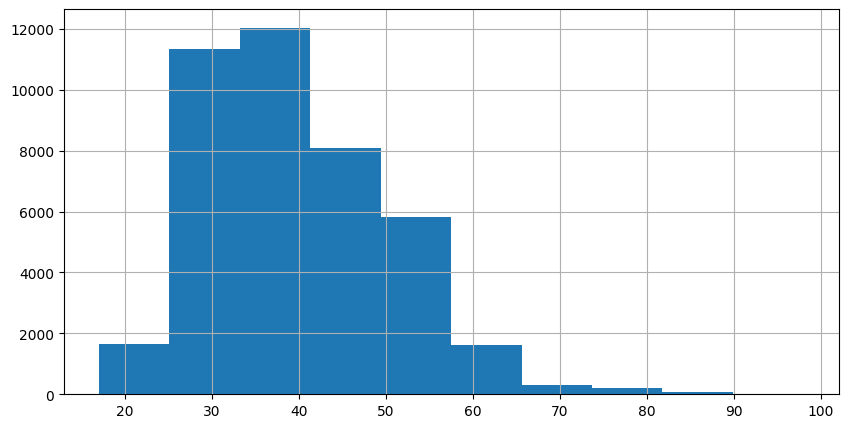

In [ ]:
#Displaying the various age groups of the consumers as a simple histogram
df["age"].hist()

<Axes: >

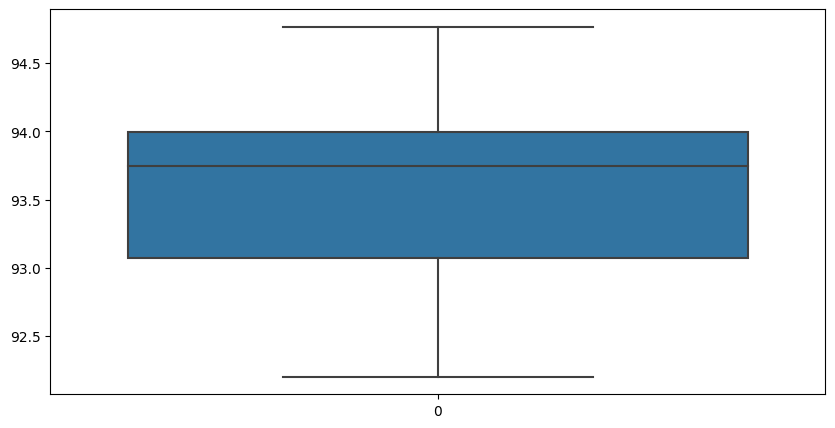

In [ ]:
#Visualization of the "cons.price.idx feature" using seaborn boxplot
sns.boxplot(df["cons.price.idx"])

<Axes: xlabel='duration', ylabel='Count'>

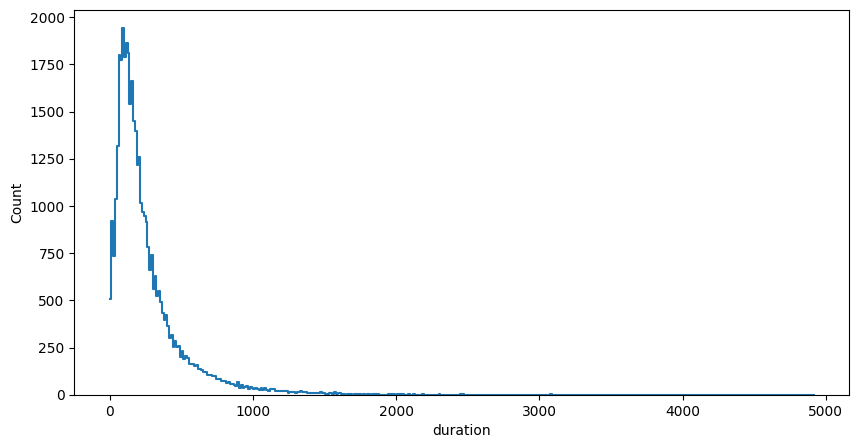

In [ ]:
#Visualizing the duration of calls made for a minimum of 5 mins (300 secs)
sns.histplot(df["duration"], stat = "count", thresh = 300, element = "step", fill = False)

Visualization of Categorical Features

<Axes: xlabel='marital', ylabel='Count'>

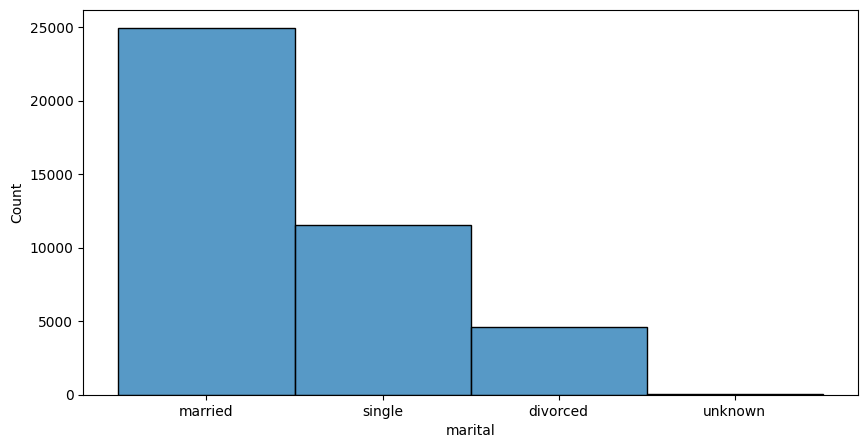

In [ ]:
#Visualizing the various categories of marital status
sns.histplot(x = df["marital"])

<Axes: xlabel='Count', ylabel='job'>

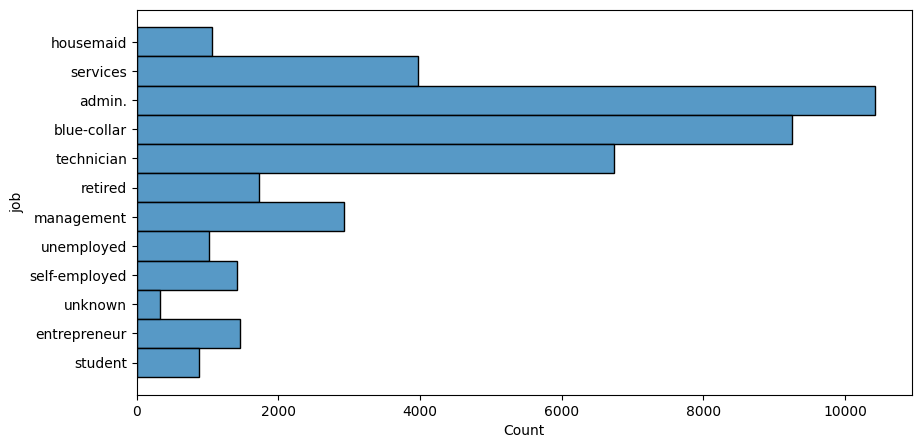

In [ ]:
#Plot the graphical client distribution by the 5 most common types of employment
sns.histplot(y = df["job"])

# Visualization of Feature Interaction

Categorical Vs Categorical Interaction

<Axes: xlabel='marital', ylabel='count'>

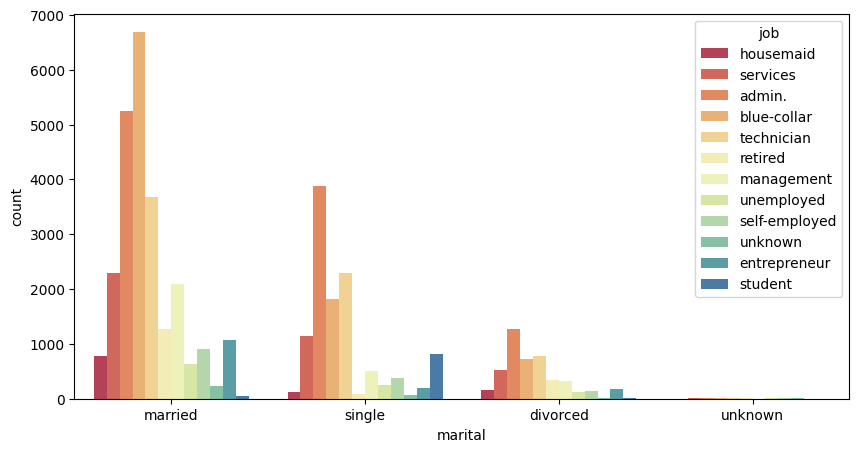

In [ ]:
#Visualizing the interaction between target and client marital status features

sns.countplot(x = "marital", hue = "job", data = df, palette = "Spectral")

Numerical Vs Categorical Interaction

<Axes: xlabel='age', ylabel='education'>

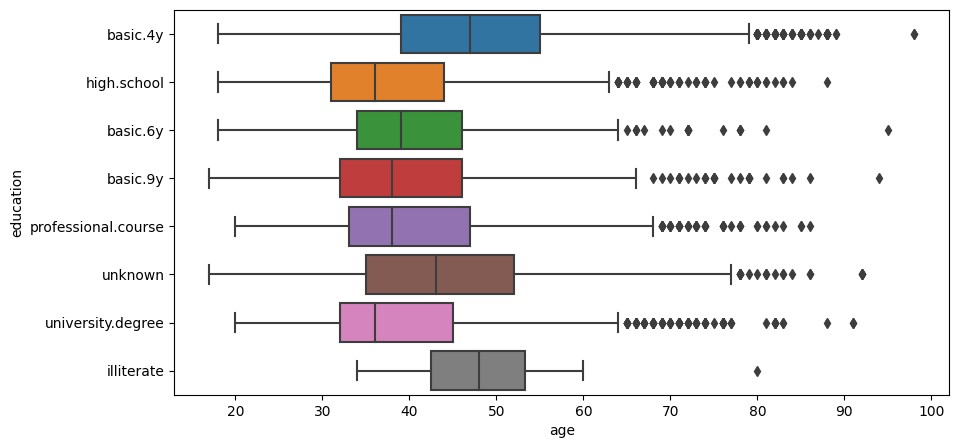

In [ ]:
#Visualizing the interaction between age feature by the educational qualifications
sns.boxplot(x = "age", y = "education", data = df)

<Axes: xlabel='housing', ylabel='age'>

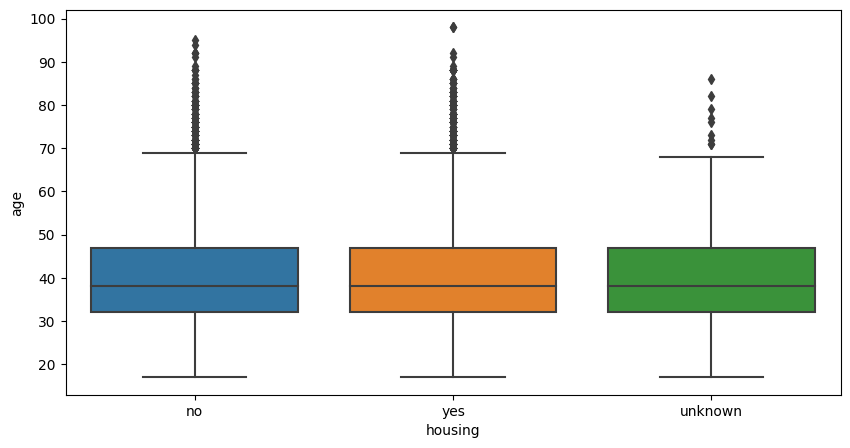

In [ ]:
#Visualizing the interaction between client age & housing loan
sns.boxplot(df, x = "housing", y = "age")

Numerical Vs Numerical Interaction

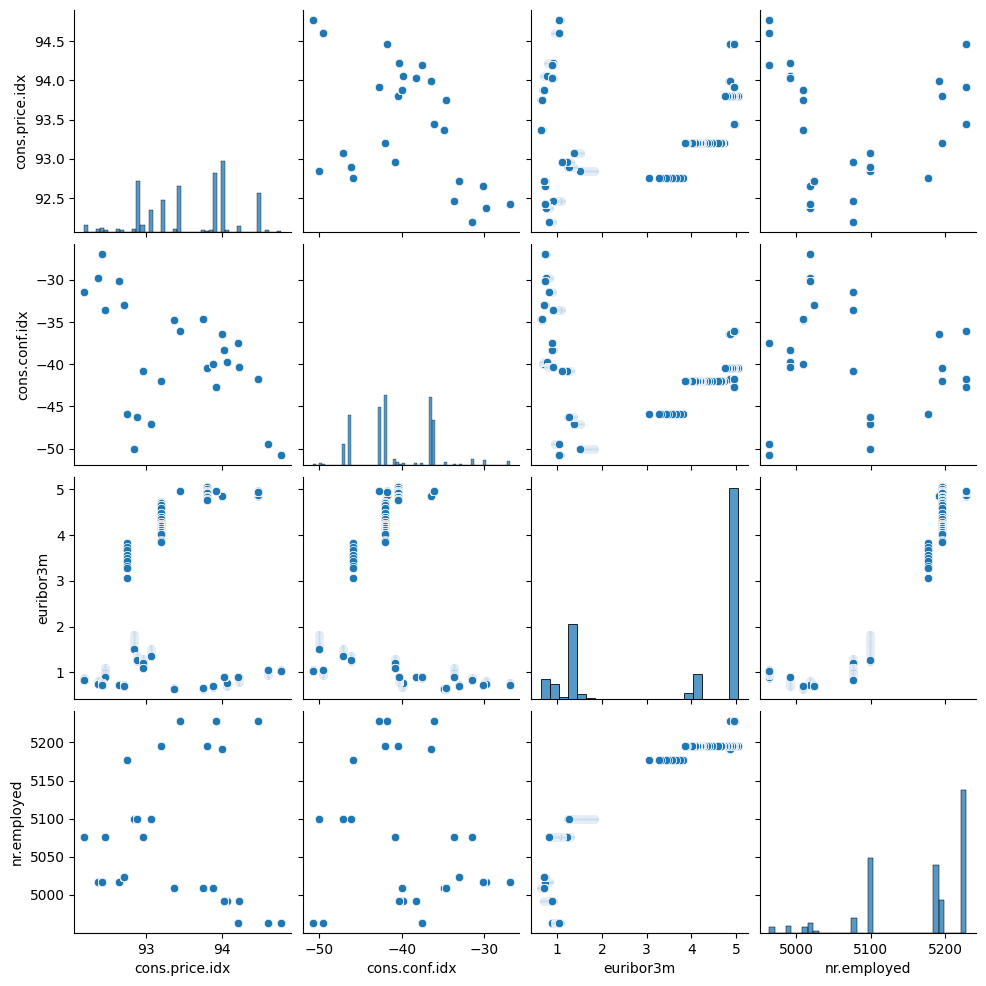

In [ ]:
#Visualizing the values ​​of the economy macro indicators from the dataset.
feat = ["cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
sns.pairplot(df[feat])

# Comprehensive Visual Analysis of the Banking Dataset

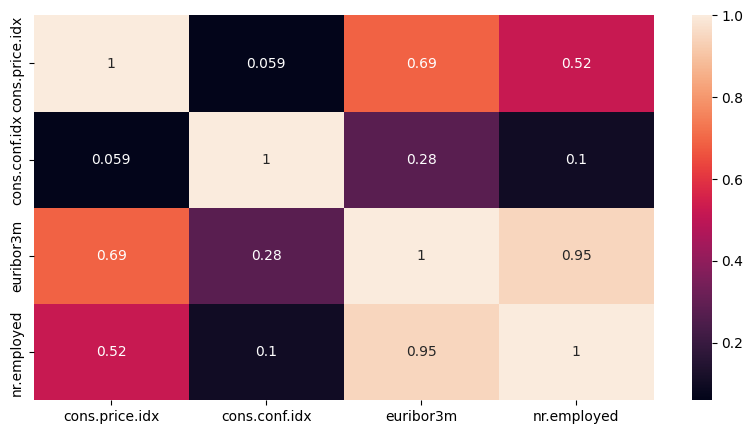

In [ ]:
#Identifying the relationship between certain numerical features using a heatmap
feat = ["cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
sns.heatmap(df[feat].corr(), annot = True);

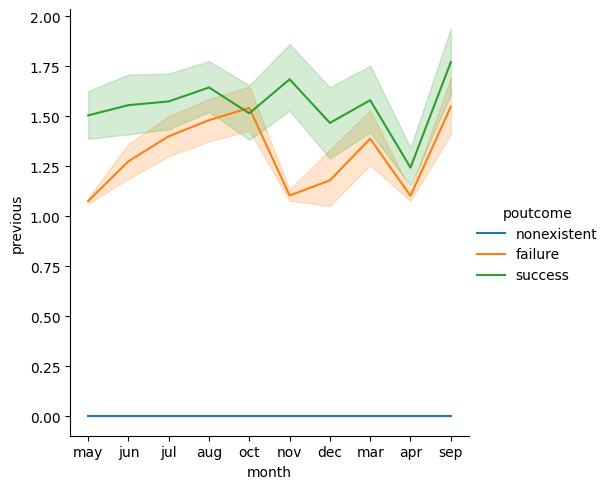

In [ ]:
#Visualizing the variation in the previous campaigns month-wise with respect to the outcomes
sns.relplot(df, x = "month", y = "previous", hue = "poutcome", kind = "line", )

<Axes: xlabel='emp.var.rate', ylabel='cons.conf.idx'>

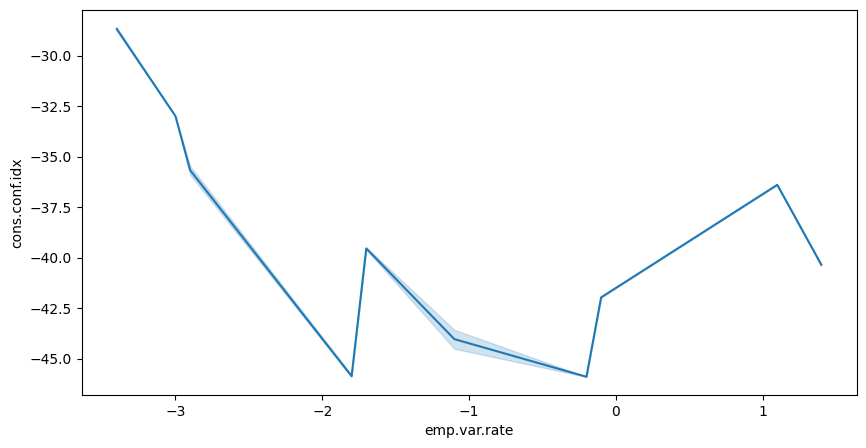

In [ ]:
#Visualization of the relationship between employee variation rate and consumer confidence index
sns.lineplot(df, x = "emp.var.rate", y = "cons.conf.idx")

<Axes: xlabel='cons.price.idx', ylabel='cons.conf.idx'>

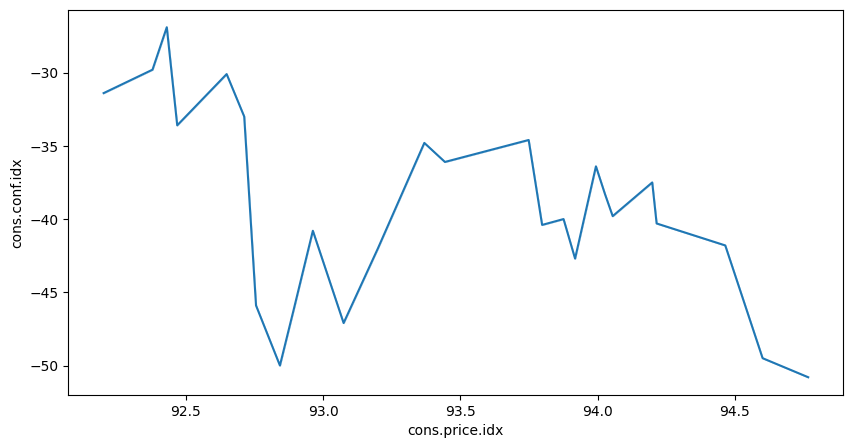

In [ ]:
#Plotting the effect of consumer price index and the consumer confidence index
sns.lineplot(df, x = "cons.price.idx", y = "cons.conf.idx")

<Axes: xlabel='age', ylabel='education'>

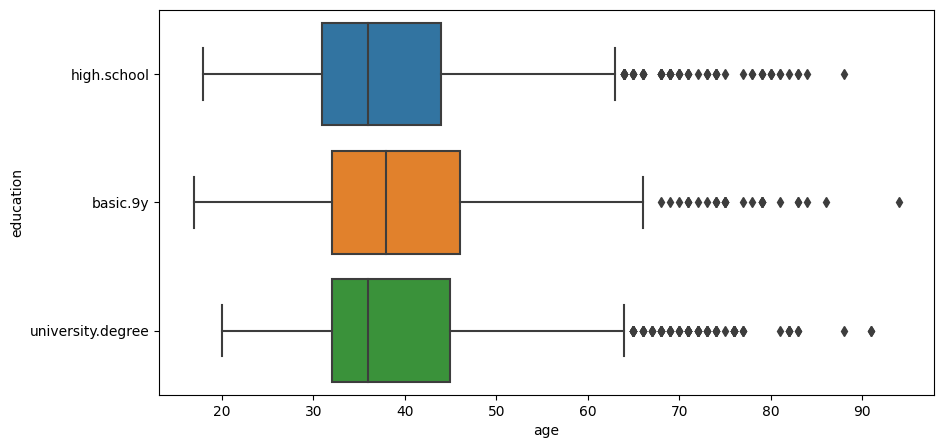

In [ ]:
#Comparing the age of customers for the top 3 of the most common levels of education
top_3 = (df.education.value_counts().sort_values(ascending=False).head(3).index.values)
sns.boxplot(y = "education", x = "age", data = df[df.education.isin(top_3)], orient = "h")

# Success Criteria

The main success criteria of the project is to :

1.   Visualize a banking dataset with MatplotLib, Seaborn and Plotly libraries.
2.   Visually analyze single features and feature interaction.
3.   Do a comprehensive visual data analysis for the source dataset.



This dataset is public available for research. The details are described in [Moro et al., 2014]. Please include this citation if you plan to use this database: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

# Conclusion

From the performed exploratory data analysis and visualization of the banking dataset, the following conclusions were driven


1.   There is a strong correlation between the number of employees and the European Interbank Offered Rate (EURIBOR).

2.   The Employment Variation Rate and EURIBOR show a significant correlation. This means that when the interest rates are high, there is an increase in the number of people seeking financial assistance.

3.   There is a bi-directional causal relationship between the CCI and CPI. This means that changes in one index can lead to changes in the other index. For example, an increase in the CPI can lead to a decrease in the CCI, as consumers are less likely to spend money. Conversely, a decrease in the CCI can lead to an increase in the CPI, as consumers may become more price-sensitive and less likely to buy goods and services.

4.   There is a robust causal relationship between employee turnover and consumer confidence. A high employee turnover rate is a sign of an unstable company, which can lead to decreased consumer confidence.

These conclusions may help us in making better decisions that may provide an advantage from the business perspective.

# References


The data that we are going to use for this is a subset of an open source Bank Marketing Data Set from the UCI ML repository: https://archive.ics.uci.edu/ml/citation_policy.html.

> This dataset is public available for research. The details are described in [Moro et al., 2014].
Please include this citation if you plan to use this database:
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014